In [1]:
# loading libraries

import os
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
# clusters 1 – 4

In [4]:
clusters_1_4 = pd.read_csv("./assets/csv/clusters_1_5.csv", sep=",").drop(
    columns=["Unnamed: 0", "icao_origin"]
)

In [5]:
clusters_1_4 = clusters_1_4[clusters_1_4["cluster"] != 0]

In [6]:
clusters_1_4_dict = {1:2, 2:1, 3:4, 4:3}

In [7]:
clusters_1_4['cluster'] = clusters_1_4['cluster'].replace(clusters_1_4_dict)

In [8]:
clusters_1_4.sort_values(by='cluster')

,icao_code,count,icao_code_old,lat_dd,long_dd,city_primary,state,cluster
0,SBGR,818607,NaN,-23.435556,-46.473056,Guarulhos,SP,1
2,SBBR,732100,NaN,-15.871111,-47.918611,Brasília,DF,1
1,SBSP,794108,NaN,-23.626111,-46.656389,São paulo,SP,2
4,SBGL,520716,NaN,-22.810000,-43.250556,Rio de janeiro,RJ,2
7,SBSV,409223,NaN,-12.908611,-38.322500,Salvador,BA,2
8,SBRF,363013,NaN,-8.126389,-34.922778,Recife,PE,2
11,SBFZ,251414,NaN,-3.775833,-38.532222,Fortaleza,CE,2
3,SBKP,554891,NaN,-23.006944,-47.134444,Campinas,SP,3
5,SBCF,482746,NaN,-19.624444,-43.971944,Confins,MG,3
6,SBRJ,418201,NaN,-22.910000,-43.162500,Rio de janeiro,RJ,3


In [9]:
# clusters 5 – 8

In [10]:
clusters_5_8 = pd.read_csv("./assets/csv/clusters_2_4.csv", sep=",").drop(
    columns=["Unnamed: 0", "icao_origin"]
)

In [11]:
clusters_5_8_dict = {1:5, 2:6, 3:7, 0:8}

In [12]:
clusters_5_8['cluster'] = clusters_5_8['cluster'].replace(clusters_5_8_dict)

In [13]:
clusters_5_8.sort_values(by='cluster')

,icao_code,count,icao_code_old,lat_dd,long_dd,city_primary,state,cluster
0,SBNF,75351,NaN,-26.878611,-48.650833,Navegantes,SC,5
3,SBPS,49452,NaN,-16.438056,-39.077778,Porto seguro,BA,5
14,SBRB,23213,NaN,-9.868333,-67.898056,Rio branco,AC,5
20,SBIZ,18325,NaN,-5.530556,-47.458333,Imperatriz,MA,6
16,SBPL,21880,NaN,-9.367500,-40.563611,Petrolina,PE,6
...,...,...,...,...,...,...,...,...
88,SWFX,710,NaN,-11.631944,-50.688333,São félix do araguaia,MT,8
89,SWLB,675,NaN,-7.278889,-64.769444,Lábrea,AM,8
90,SBPG,674,SSZW,-25.184444,-50.143889,Ponta grossa,PR,8
82,SBUA,875,NaN,-0.148056,-66.985833,São gabriel da cachoeira,AM,8


In [14]:
# all_dfs = [clusters_1_4, clusters_5_8]
df_2002_2021s = pd.concat([clusters_1_4, clusters_5_8]).reset_index(drop=True)

In [15]:
df_2002_2021s.sort_values(by='cluster')

,icao_code,count,icao_code_old,lat_dd,long_dd,city_primary,state,cluster
0,SBGR,818607,NaN,-23.435556,-46.473056,Guarulhos,SP,1
2,SBBR,732100,NaN,-15.871111,-47.918611,Brasília,DF,1
1,SBSP,794108,NaN,-23.626111,-46.656389,São paulo,SP,2
4,SBGL,520716,NaN,-22.810000,-43.250556,Rio de janeiro,RJ,2
7,SBSV,409223,NaN,-12.908611,-38.322500,Salvador,BA,2
...,...,...,...,...,...,...,...,...
115,SWFX,710,NaN,-11.631944,-50.688333,São félix do araguaia,MT,8
116,SWLB,675,NaN,-7.278889,-64.769444,Lábrea,AM,8
117,SBPG,674,SSZW,-25.184444,-50.143889,Ponta grossa,PR,8
109,SBUA,875,NaN,-0.148056,-66.985833,São gabriel da cachoeira,AM,8


In [16]:
df_2002_2021s[df_2002_2021s['cluster'] == 1]

,icao_code,count,icao_code_old,lat_dd,long_dd,city_primary,state,cluster
0,SBGR,818607,NaN,-23.435556,-46.473056,Guarulhos,SP,1
2,SBBR,732100,NaN,-15.871111,-47.918611,Brasília,DF,1


In [17]:
df_2002_2021s['percentage'] = round((df_2002_2021s['count'] / df_2002_2021s['count'].sum()) * 100, 2)

In [18]:
df_2002_2021s

,icao_code,count,icao_code_old,lat_dd,long_dd,city_primary,state,cluster,percentage
0,SBGR,818607,NaN,-23.435556,-46.473056,Guarulhos,SP,1,9.35
1,SBSP,794108,NaN,-23.626111,-46.656389,São paulo,SP,2,9.07
2,SBBR,732100,NaN,-15.871111,-47.918611,Brasília,DF,1,8.37
3,SBKP,554891,NaN,-23.006944,-47.134444,Campinas,SP,3,6.34
4,SBGL,520716,NaN,-22.810000,-43.250556,Rio de janeiro,RJ,2,5.95
...,...,...,...,...,...,...,...,...,...
221,SSLT,5,NaN,-29.812500,-55.893333,Alegrete,RS,8,0.00
222,SILC,4,NaN,-13.037778,-55.950278,Lucas do rio verde,MT,8,0.00
223,SIZX,4,NaN,-11.296667,-57.548889,Juara,MT,8,0.00
224,SSOE,3,NaN,-26.781111,-53.503333,São miguel do oeste,SC,8,0.00


In [19]:
df_clusters = pd.read_csv("./assets/csv/df_clusters.csv", sep=",", index_col=0)

In [20]:
df_clusters = df_clusters[['cluster', 'icao_code', 'icao_code_old', 'lat_dd', 'long_dd', 'city_primary', 'state', 'count', 'percentage']]

In [21]:
df_clusters.sort_values(by='cluster', inplace=True, ignore_index=True)

In [22]:
df_clusters

,cluster,icao_code,icao_code_old,lat_dd,long_dd,city_primary,state,count,percentage
0,1,SBGR,NaN,-23.435556,-46.473056,Guarulhos,SP,818607,9.35
1,1,SBBR,NaN,-15.871111,-47.918611,Brasília,DF,732100,8.37
2,2,SBSP,NaN,-23.626111,-46.656389,São paulo,SP,794108,9.07
3,2,SBGL,NaN,-22.810000,-43.250556,Rio de janeiro,RJ,520716,5.95
4,2,SBSV,NaN,-12.908611,-38.322500,Salvador,BA,409223,4.68
...,...,...,...,...,...,...,...,...,...
221,8,SILC,NaN,-13.037778,-55.950278,Lucas do rio verde,MT,4,0.00
222,8,SIZX,NaN,-11.296667,-57.548889,Juara,MT,4,0.00
223,8,SNNU,NaN,-17.823056,-40.329722,Nanuque,MG,23,0.00
224,8,SNWS,NaN,-5.211111,-40.704167,Crateús,CE,9,0.00


In [32]:
count_perc = df_clusters.groupby('cluster').agg(
    nr_airports=('icao_code',lambda x: x.nunique()),
    count=('count','sum'),
    percentage=('percentage','sum')
).reset_index()

In [33]:
count_perc

,cluster,nr_airports,count,percentage
0,1,2,1550707,17.72
1,2,5,2338474,26.72
2,3,6,2117470,24.20
3,4,14,1653230,18.89
4,5,3,148016,1.70
5,6,14,495725,5.65
6,7,14,234609,2.69
7,8,168,213611,2.34


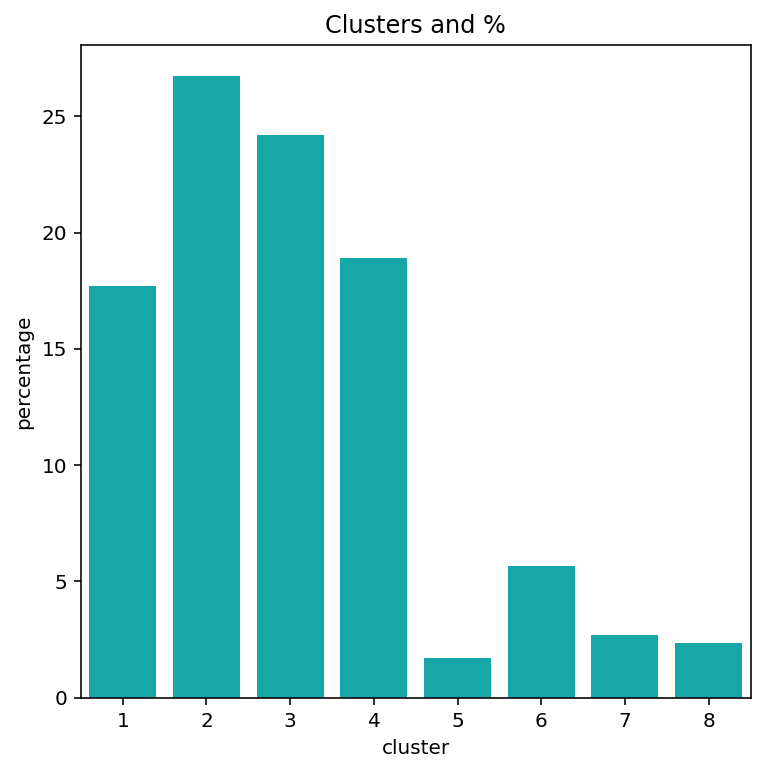

In [25]:
# Set up for higher resolution screen
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(6, 6))
plt.title('Clusters and %')
# Plot DataFrame
sns.barplot(x='cluster', y='percentage', data=count_perc, color="c")
plt.show()

In [26]:
map_clusters = folium.Map(location=[-15, -55], zoom_start=4)
n_mean = df_clusters['count'].mean()

# set color scheme for the clusters
x = np.arange(8)
ys = [i + x + (i * x) ** 2 for i in range(8)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, number, cluster, city, state in zip(
    df_clusters["lat_dd"],
    df_clusters["long_dd"],
    df_clusters["count"],
    df_clusters["cluster"],
    df_clusters["city_primary"],
    df_clusters["state"],
):
    # label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=number/n_mean*2,
        # popup=label,
        tooltip=str(city) + ", " + str(state) + " – Cluster " + str(cluster),
        color=rainbow[cluster - 1],
        fill=True,
        fill_color=rainbow[cluster - 1],
        fill_opacity=0.9,
    ).add_to(map_clusters)

map_clusters